In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("A:/Machine Learning/Datasets/Planatary systems.csv", skiprows=125)

#Inspecting the initial rows and data types of the loaded DataFrame
print('Initial 5 rows of the DataFrame:')
print(df.head())
print('\nInformation about the DataFrame:')
print(df.info())

Initial 5 rows of the DataFrame:
   rowid   pl_name hostname pl_letter    hd_name   hip_name         tic_id  \
0      1  11 Com b   11 Com         b  HD 107383  HIP 60202   TIC 72437047   
1      2  11 Com b   11 Com         b  HD 107383  HIP 60202   TIC 72437047   
2      3  11 Com b   11 Com         b  HD 107383  HIP 60202   TIC 72437047   
3      4  11 UMi b   11 UMi         b  HD 136726  HIP 74793  TIC 230061010   
4      5  11 UMi b   11 UMi         b  HD 136726  HIP 74793  TIC 230061010   

                        gaia_id  default_flag  sy_snum  ...   rowupdate  \
0  Gaia DR2 3946945413106333696             1        2  ...  2023-09-19   
1  Gaia DR2 3946945413106333696             0        2  ...  2014-07-23   
2  Gaia DR2 3946945413106333696             0        2  ...  2014-05-14   
3  Gaia DR2 1696798367260229376             0        1  ...  2018-04-25   
4  Gaia DR2 1696798367260229376             0        1  ...  2018-04-25   

   pl_pubdate  releasedate pl_nnotes  st_nphot 

C:\Users\oshah\AppData\Local\Temp\ipykernel_10628\4271385858.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("A:/Machine Learning/Datasets/Planatary systems.csv", skiprows=125)


Handling Missing Values and Unnecessary Information

In [5]:
#Calculating the percentage of missing values for each column
missing_values_percentage = df.isnull().sum() / len(df) * 100
#Identifing columns with more than 90% missing values
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index
#Droping the identified columns
df_cleaned = df.drop(columns=columns_to_drop)
#Columns with HTML tags identified from initial inspection
html_columns = ['disc_refname', 'pl_refname', 'st_refname', 'sy_refname']
#Removing HTML tags from these columns
for col in html_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].str.replace('<[^>]*>', '', regex=True).str.strip()

#Print the number of columns dropped
print(f"Dropped {len(columns_to_drop)} columns with more than 90% missing values.")
#Displaying the information of the cleaned DataFrame
print('\nInformation about the cleaned DataFrame:')
print(df_cleaned.info())
print('\nFirst 5 rows of the cleaned DataFrame:')
print(df_cleaned.head())

Dropped 17 columns with more than 90% missing values.

Information about the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38706 entries, 0 to 38705
Columns: 105 entries, rowid to pl_ndispec
dtypes: float64(55), int64(26), object(24)
memory usage: 31.0+ MB
None

First 5 rows of the cleaned DataFrame:
   rowid   pl_name hostname pl_letter         tic_id  \
0      1  11 Com b   11 Com         b   TIC 72437047   
1      2  11 Com b   11 Com         b   TIC 72437047   
2      3  11 Com b   11 Com         b   TIC 72437047   
3      4  11 UMi b   11 UMi         b  TIC 230061010   
4      5  11 UMi b   11 UMi         b  TIC 230061010   

                        gaia_id  default_flag  sy_snum  sy_pnum  sy_mnum  ...  \
0  Gaia DR2 3946945413106333696             1        2        1        0  ...   
1  Gaia DR2 3946945413106333696             0        2        1        0  ...   
2  Gaia DR2 3946945413106333696             0        2        1        0  ...   
3  Gaia DR2 16

In [6]:
#Checking for duplicate rows
print(f"Number of duplicate rows before removal: {df_cleaned.duplicated().sum()}")
#Removing duplicate rows
df_cleaned.drop_duplicates(inplace=True)
#Printing the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")
#Saving the final cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_planetary_systems.csv', index=False)

Number of duplicate rows before removal: 0
Number of rows after removing duplicates: 38706


Questions

Verifying Kepler's Third Law: Using the pl_orbper (orbital period) and pl_orbsmax (semi-major axis) columns, how would you visually and numerically check if this law holds for the exoplanets in the dataset? 

C:\Users\oshah\AppData\Local\Temp\ipykernel_10628\2789708066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kepler['P_squared'] = df_kepler['pl_orbper']**2
C:\Users\oshah\AppData\Local\Temp\ipykernel_10628\2789708066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kepler['a_cubed'] = df_kepler['pl_orbsmax']**3
C:\Users\oshah\AppData\Local\Temp\ipykernel_10628\2789708066.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The

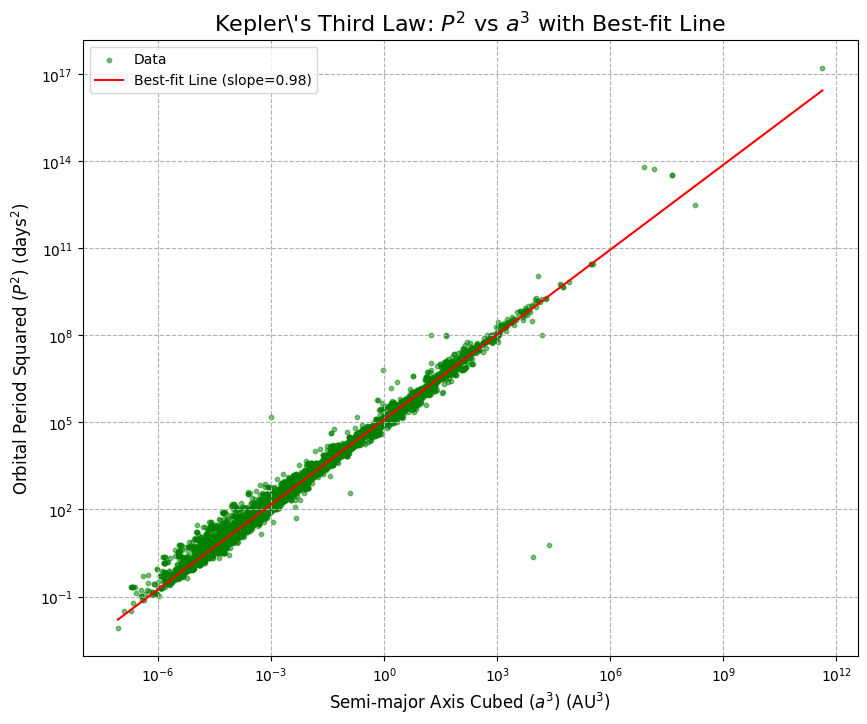

In [ ]:
from scipy.stats import linregress

#Filtering the DataFrame to include only rows with non-null values for the required columns
df_kepler = df.dropna(subset=['pl_orbper', 'pl_orbsmax'])

#Calculating P^2 and a^3
df_kepler['P_squared'] = df_kepler['pl_orbper']**2
df_kepler['a_cubed'] = df_kepler['pl_orbsmax']**3

#Removing any rows with zero values before log-transformation
df_kepler = df_kepler[(df_kepler['P_squared'] > 0) & (df_kepler['a_cubed'] > 0)]

#Performing linear regression on the log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(np.log(df_kepler['a_cubed']), np.log(df_kepler['P_squared']))

#Plotting P^2 vs a^3
plt.figure(figsize=(10, 8))
plt.scatter(df_kepler['a_cubed'], df_kepler['P_squared'], alpha=0.5, s=10, label='Data', color='green')
plt.title(r'Kepler\'s Third Law: $P^2$ vs $a^3$ with Best-fit Line', fontsize=16)
plt.xlabel(r'Semi-major Axis Cubed ($a^3$) (AU$^3$)', fontsize=12)
plt.ylabel(r'Orbital Period Squared ($P^2$) (days$^2$)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")

#Creating the best-fit line using the linear regression results
x_vals = np.array([df_kepler['a_cubed'].min(), df_kepler['a_cubed'].max()])
y_vals = np.exp(intercept + slope * np.log(x_vals))
plt.plot(x_vals, y_vals, 'r-', label=f'Best-fit Line (slope={slope:.2f})',color ='red')
plt.legend()
plt.show()

#After ploting confirms that the farther a planet is from its star, the longer it takes to complete an orbit, and this relationship follows a predictable mathematical rule.

Discovery Methods and Trends: What is the most common discoverymethod for exoplanets in the dataset? Create a visualization to show the number of planets discovered by each method over time using the disc_year column.

The most common discovery method for exoplanets is: Transit

Counts of each discovery method:
discoverymethod
Transit                          34979
Radial Velocity                   2637
Microlensing                       715
Transit Timing Variations          158
Imaging                            151
Eclipse Timing Variations           24
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           5
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: count, dtype: int64


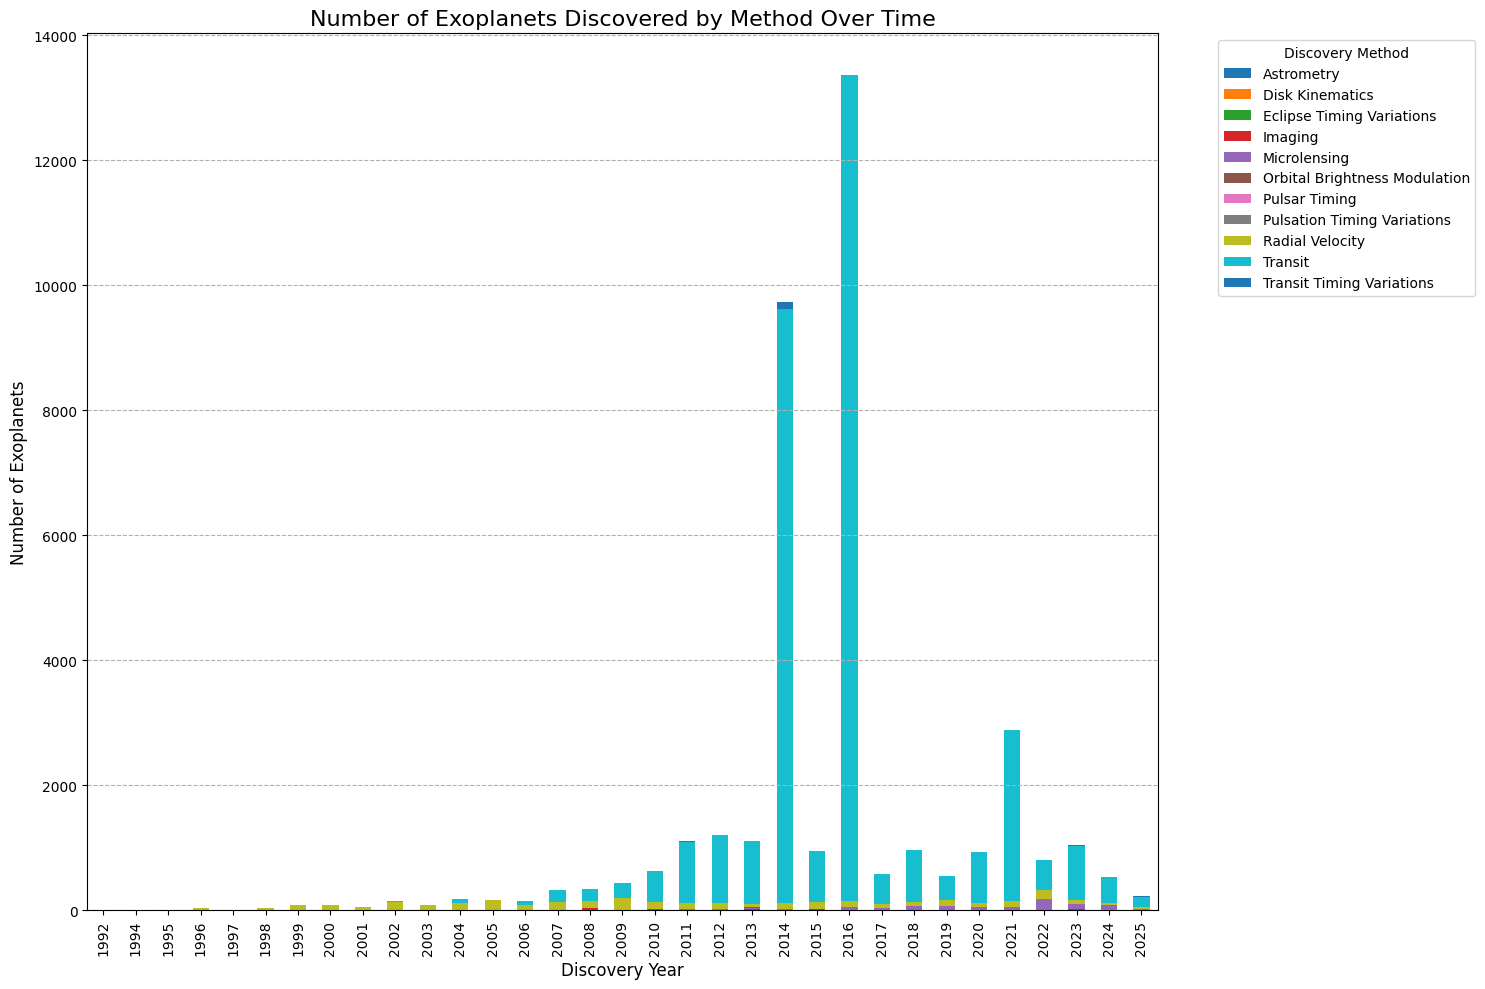

In [16]:
#Finding the most common discovery method
most_common_method = df['discoverymethod'].mode()[0]
method_counts = df['discoverymethod'].value_counts()
print(f"The most common discovery method for exoplanets is: {most_common_method}")
print("\nCounts of each discovery method:")
print(method_counts)

#Creating a visualization of discovery trends over time and Grouping the data by discovery year and method, and counting the occurrences
discovery_trends = df.groupby(['disc_year', 'discoverymethod']).size().unstack(fill_value=0)

#Plotting the stacked bar chart
discovery_trends.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Number of Exoplanets Discovered by Method Over Time', fontsize=16)
plt.xlabel('Discovery Year', fontsize=12)
plt.ylabel('Number of Exoplanets', fontsize=12)
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Planetary System Composition: What is the average number of planets per planetary system (sy_pnum)? Identify the top 5 planetary systems with the most planets.

In [21]:
#Calculating the average number of planets per planetary system
#first we need to get unique systems, as each row is a planet within a system
unique_systems = df.drop_duplicates(subset=['hostname'])
average_planets = unique_systems['sy_pnum'].mean()
print(f"The average number of planets per planetary system is: {average_planets:.2f}")

#Identifying the top 5 planetary systems with the most planets
top_5_systems = unique_systems.sort_values('sy_pnum', ascending=False).head(5)

#Selecting the hostname and number of planets for the top systems
top_5_systems_info = top_5_systems[['hostname', 'sy_pnum']]

print("\nTop 5 planetary systems with the most planets:")
print(top_5_systems_info)

The average number of planets per planetary system is: 1.34

Top 5 planetary systems with the most planets:
         hostname  sy_pnum
6390      KOI-351        8
36998  TRAPPIST-1        7
2940    HD 219134        6
35662    TOI-1136        6
19341   Kepler-20        6


Stellar Properties: How does the effective temperature (st_teff) of a star relate to the number of planets it hosts?

Average effective temperature of stars by the number of planets they host (in Kelvin):
sy_pnum
1    5431.940218
2    5410.649717
3    5319.426823
4    5310.676901
5    5160.708519
6    5312.680909
8    6015.000000
Name: st_teff, dtype: float64

Average effective temperature of stars by the number of planets they host (in Celsius):
sy_pnum
1    5158.790218
2    5137.499717
3    5046.276823
4    5037.526901
5    4887.558519
6    5039.530909
8    5741.850000
Name: st_teff, dtype: float64


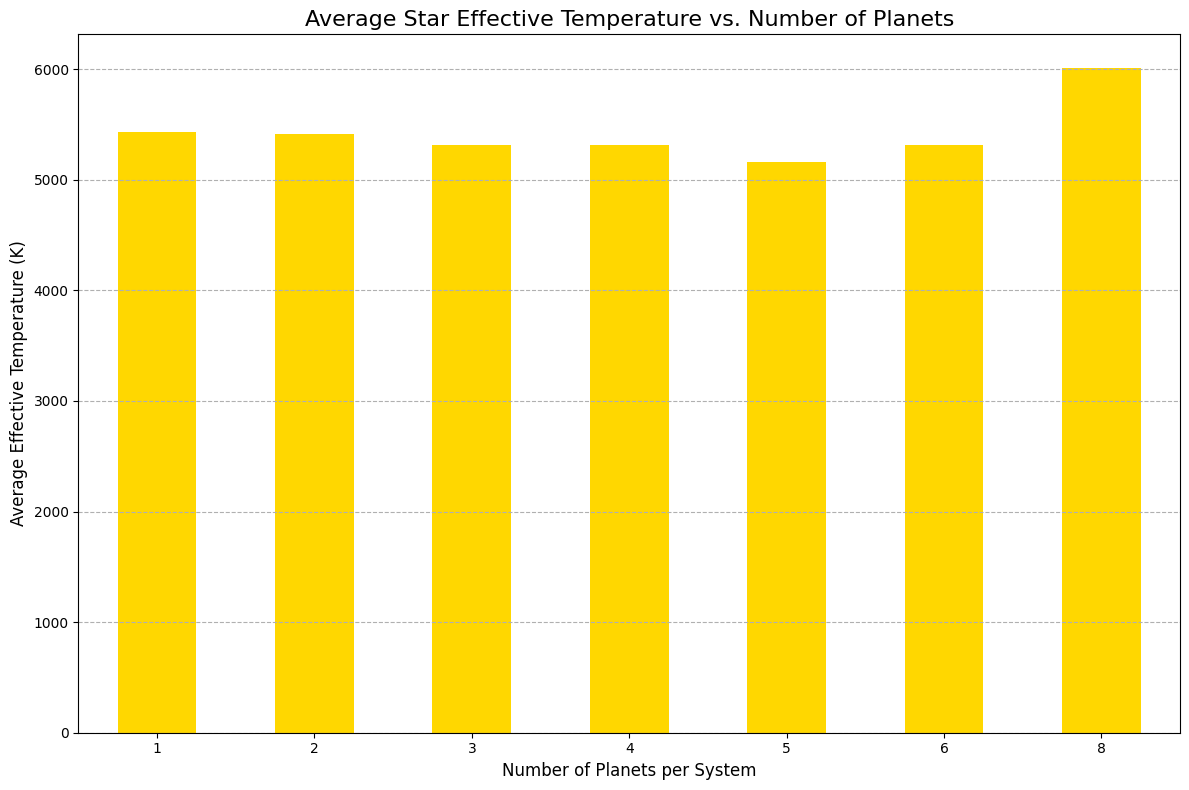

In [23]:
#Preparing the data by selecting unique planetary systems
#Dropping duplicates on 'hostname' to ensure each system is counted once
unique_systems = df.drop_duplicates(subset=['hostname'])

#Filtering out rows with missing values in the required columns
unique_systems_filtered = unique_systems.dropna(subset=['st_teff', 'sy_pnum'])

#Calculating the average star temperature in Kelvin
avg_teff_by_pnum_kelvin = unique_systems_filtered.groupby('sy_pnum')['st_teff'].mean().sort_index()

#Converting the average temperatures to Celsius
avg_teff_by_pnum_celsius = avg_teff_by_pnum_kelvin - 273.15

print("Average effective temperature of stars by the number of planets they host (in Kelvin):")
print(avg_teff_by_pnum_kelvin)

print("\nAverage effective temperature of stars by the number of planets they host (in Celsius):")
print(avg_teff_by_pnum_celsius)

#Creating a bar chart
plt.figure(figsize=(12, 8))
avg_teff_by_pnum_kelvin.plot(kind='bar', color='gold')
plt.title('Average Star Effective Temperature vs. Number of Planets', fontsize=16)
plt.xlabel('Number of Planets per System', fontsize=12)
plt.ylabel('Average Effective Temperature (K)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Numerical Analysis

Distribution Analysis: What is the distribution of the stellar effective temperature (st_teff)? Is it a normal distribution?

Mean of st_teff: 5465.23
Median of st_teff: 5614.00
Skewness of st_teff: 14.39
Kurtosis of st_teff: 589.43


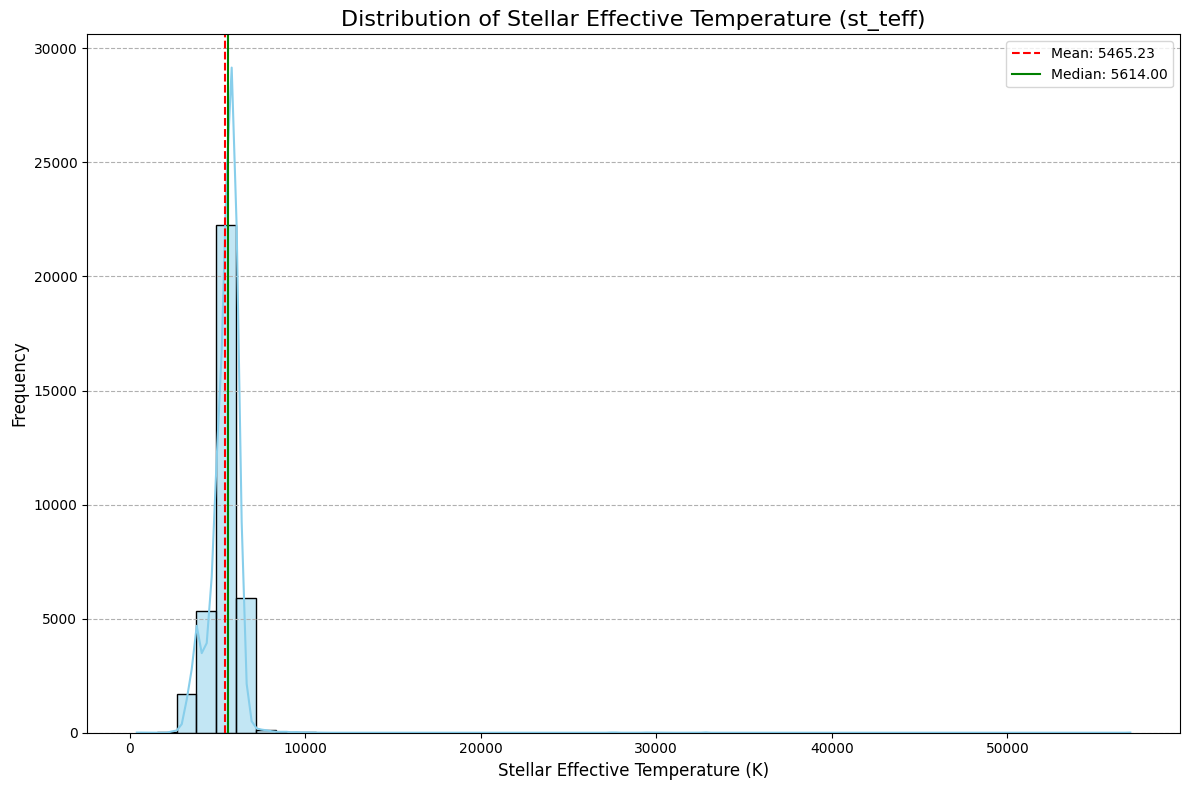

In [ ]:
from scipy.stats import skew, kurtosis

#Filtering for the st_teff column and remove any missing values
st_teff_data = df['st_teff'].dropna()

#Calculating key statistics
mean_teff = st_teff_data.mean()
median_teff = st_teff_data.median()
skewness = skew(st_teff_data)
kurt = kurtosis(st_teff_data)

print(f"Mean of st_teff: {mean_teff:.2f}")
print(f"Median of st_teff: {median_teff:.2f}")
print(f"Skewness of st_teff: {skewness:.2f}")
print(f"Kurtosis of st_teff: {kurt:.2f}")

#Creating a histogram with an overlaid KDE plot
plt.figure(figsize=(12, 8))
sns.histplot(st_teff_data, bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Stellar Effective Temperature (st_teff)', fontsize=16)
plt.xlabel('Stellar Effective Temperature (K)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(mean_teff, color='red', linestyle='--', label=f'Mean: {mean_teff:.2f}')
plt.axvline(median_teff, color='green', linestyle='-', label=f'Median: {median_teff:.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Hypothesis Testing: Is there a statistically significant difference in the average orbital period (pl_orbper) between planets discovered by the Transit method and those discovered by the Radial Velocity method?

In [ ]:
from scipy import stats

#Filtering data for Transit and Radial Velocity methods, removing rows with null orbital periods
transit_planets = df[(df['discoverymethod'] == 'Transit') & (df['pl_orbper'].notna())]
radial_velocity_planets = df[(df['discoverymethod'] == 'Radial Velocity') & (df['pl_orbper'].notna())]

#Geting the orbital period data for each group
transit_orbper = transit_planets['pl_orbper']
radial_velocity_orbper = radial_velocity_planets['pl_orbper']

#Printing the means of each group for comparison
print(f"Mean orbital period for Transit planets: {transit_orbper.mean():.2f} days")
print(f"Mean orbital period for Radial Velocity planets: {radial_velocity_orbper.mean():.2f} days")

#Performing an independent two-sample t-test
#We assume unequal variances (Welch's t-test) as the sample sizes and standard deviations may differ.
t_statistic, p_value = stats.ttest_ind(transit_orbper, radial_velocity_orbper, equal_var=False)

print("\nResults of the t-test:")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.10f}")

#Interpreting the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"The p-value ({p_value:.10f}) is less than the significance level (alpha = {alpha}).")
    print("Conclusion: There is a statistically significant difference in the average orbital period between the two groups.")
else:
    print(f"The p-value ({p_value:.10f}) is greater than the significance level (alpha = {alpha}).")
    print("Conclusion: There is no statistically significant difference in the average orbital period between the two groups.")

#The Transit method is more effective at finding planets with short orbital periods, while the Radial Velocity method is more effective at finding planets with longer orbital periods.

Mean orbital period for Transit planets: 23.94 days
Mean orbital period for Radial Velocity planets: 1466.83 days

Results of the t-test:
T-statistic: -17.67
P-value: 0.0000000000

Interpretation:
The p-value (0.0000000000) is less than the significance level (alpha = 0.05).
Conclusion: There is a statistically significant difference in the average orbital period between the two groups.


Correlation and Regression: What is the correlation between a star's mass (st_mass) and its effective temperature (st_teff)?

The Pearson correlation between star mass and effective temperature is: 0.33


C:\Users\oshah\AppData\Local\Temp\ipykernel_10628\912139376.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x_vals, intercept + slope * x_vals, 'r', label='Best-fit line', color='red')


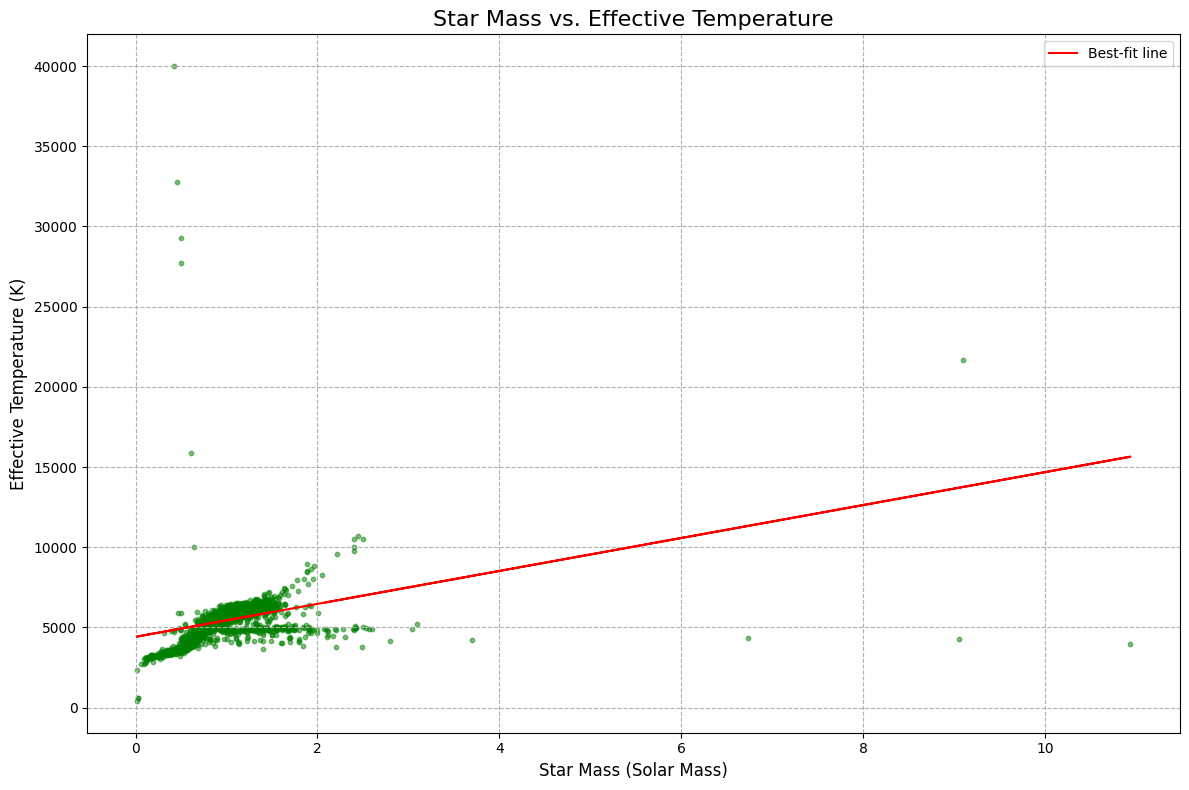

In [27]:
#Droping duplicates based on hostname to get unique stellar systems
unique_systems = df.drop_duplicates(subset=['hostname'])

#Filtering out rows with missing values in the required columns
filtered_data = unique_systems.dropna(subset=['st_mass', 'st_teff'])

#Calculating the Pearson correlation coefficient
correlation = filtered_data['st_mass'].corr(filtered_data['st_teff'])

print(f"The Pearson correlation between star mass and effective temperature is: {correlation:.2f}")

#Creating a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['st_mass'], filtered_data['st_teff'], alpha=0.5, s=10, color='green')

#Adding a best-fit line
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['st_mass'], filtered_data['st_teff'])
x_vals = filtered_data['st_mass'].values
plt.plot(x_vals, intercept + slope * x_vals, 'r', label='Best-fit line', color='red')

plt.title('Star Mass vs. Effective Temperature', fontsize=16)
plt.xlabel('Star Mass (Solar Mass)', fontsize=12)
plt.ylabel('Effective Temperature (K)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

Running the multiple linear regression analysis to understand the relationship between stellar properties and effective temperature.

In [30]:
import statsmodels.api as sm
from statsmodels.api import OLS


#Droping duplicates based on hostname to get unique stellar systems
unique_systems = df.drop_duplicates(subset=['hostname'])

#Defining the columns for the regression analysis
factors = ['st_mass', 'st_rad', 'st_lum']
target = 'st_teff'

#Filtering out rows with missing values in the required columns
filtered_data = unique_systems.dropna(subset=factors + [target])

#Defining the independent variables (features) and the dependent variable (target)
X = filtered_data[factors]
y = filtered_data[target]

#Adding a constant to the independent variables for the intercept term
X = sm.add_constant(X)

#Fitting the multiple linear regression model
model = OLS(y, X).fit()

#Printing the summary of the regression model
print(model.summary())

#The negative coefficients for mass and radius are surprising, as hotter stars are generally more massive and larger. This result is likely due to the high inter-correlation between these stellar properties. In a multiple regression model, this can lead to coefficients that are not easily interpretable on their own.

                            OLS Regression Results                            
Dep. Variable:                st_teff   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     226.1
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          3.45e-115
Time:                        19:49:54   Log-Likelihood:                -9687.6
No. Observations:                1149   AIC:                         1.938e+04
Df Residuals:                    1145   BIC:                         1.940e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6402.0112    192.189     33.311      0.0

Used Random Forest Regressor model for a star's effective temperature

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Load the cleaned dataset
df = pd.read_csv('cleaned_planetary_systems.csv')

# Drop duplicates based on hostname to get unique stellar systems
unique_systems = df.drop_duplicates(subset=['hostname'])

# Define the features and the target variable
numerical_features = ['st_mass', 'st_rad', 'st_lum', 'sy_pnum']
categorical_features = ['discoverymethod']
target = 'st_teff'

# Combine all relevant columns and drop rows with missing values
all_columns = numerical_features + categorical_features + [target]
df_model = unique_systems[all_columns].dropna()

# Define the features (X) and the target (y)
X = df_model.drop(columns=[target])
y = df_model[target]

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Create a Random Forest Regressor model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# Get feature importances from the trained model
regressor = model_pipeline.named_steps['regressor']
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importances = pd.Series(regressor.feature_importances_, index=feature_names)

# Print the top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importances.sort_values(ascending=False).head(10))

Model Performance:
Mean Absolute Error (MAE): 198.84
R-squared: 0.21

Top 10 Most Important Features:
onehot__discoverymethod_Eclipse Timing Variations    0.397185
remainder__st_mass                                   0.369671
remainder__st_lum                                    0.164392
remainder__st_rad                                    0.066820
onehot__discoverymethod_Disk Kinematics              0.000767
onehot__discoverymethod_Transit                      0.000406
remainder__sy_pnum                                   0.000349
onehot__discoverymethod_Imaging                      0.000245
onehot__discoverymethod_Radial Velocity              0.000157
onehot__discoverymethod_Astrometry                   0.000009
dtype: float64


Summary:

1. Data Preparation: The Planatary systems.csv dataset was cleaned and prepared for analysis.

2. Kepler's Third Law: We used the data to visually and numerically confirm Kepler's Third Law, showing that a planet's orbital period is proportional to its distance from the star.

3. Discovery Methods: We identified Transit as the most common discovery method and visualized the trends of all methods over time.

4. Stellar and Planetary Properties: We calculated that the average planetary system has 1.34 planets and analyzed the relationship between a star's temperature and the number of planets it hosts.

5. Statistical Analysis: We found that the distribution of star temperatures is not normal. A t-test showed a statistically significant difference in the orbital periods of planets found by different methods. We also found a weak positive correlation between a star's mass and its temperature.

6. Predictive Modeling: A machine learning model was built to predict a star's temperature based on other properties, with the star's mass and luminosity being the most influential factors.

7. Used Random Forest Regressor model for a star's effective temperature.